In [72]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from IPython.display import clear_output
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

## Ticker Data Scraping - Yahoo Finance API 

In [73]:
def plot_ticker(df, nasdaq, snp, start, end, gap):
    
    plt.figure(figsize = (12,16))
    
    #----------Stock Prices Plot----------
    plt.subplot(311)
    plt.plot(df.index, df["High"], label = 'High')
    plt.plot(df.index, df["Low"], label = 'Low')
    plt.plot(df.index, df["Open"], label = 'Open')
    plt.plot(df.index, df["Close"], label = 'Close')
    plt.plot(df.index, df["Adj Close"], label = 'Adj Close')

    plt.xticks(size=8)
    plt.yticks(size=8)

    plt.ylabel('Price($)', {'color': 'gray', 'fontsize':13})

    plt.title(str(symbol.upper()), size=14, fontweight='bold')

    # Plotting the horizontal line for min & max values along with the adj close prices
    max_price = np.round(np.max(df['Adj Close']),3)
    min_price = np.round(np.min(df['Adj Close']),3)
    plt.axhline(max_price, color='r', linestyle='dashed')
    plt.axhline(min_price, color='b', linestyle='dashed')
    
    # coordinate for the text position (x-axis)
    coord = datetime.strptime(end_date,'%Y%m%d')
    coord = coord + relativedelta(days=int(gap)/11)
    # y-axis = max and min prices + 3
    plt.text(coord, max_price+5, 'AdjClose Max = $'+str(max_price), size=10, color='r')
    plt.text(coord, min_price+5, 'AdjClose Min = $'+str(min_price), size=10, color='b')
    
    plt.legend()
    plt.grid(True)
    
    #----------NASDAQ Composite Plot----------
    plt.subplot(312)
    plt.plot(nasdaq.index, nasdaq["Open"], label = 'Open')
    plt.plot(nasdaq.index, nasdaq["Adj Close"], label = 'Adj Close')

    plt.xticks(size=8)
    plt.yticks(size=8)

    plt.ylabel('Price($)', {'color': 'gray', 'fontsize':13})

    plt.title('NASDAQ Composite', size=14, fontweight='bold')

    # Plotting the horizontal line for min & max values along with the adj close prices
    max_price = np.round(np.max(nasdaq['Adj Close']),3)
    min_price = np.round(np.min(nasdaq['Adj Close']),3)
    plt.axhline(max_price, color='r', linestyle='dashed')
    plt.axhline(min_price, color='b', linestyle='dashed')
    
    # x coordinate for the text position
    coord = datetime.strptime(end_date,'%Y%m%d')
    coord = coord + relativedelta(days=int(gap)/11)
    
    # y coordinate: max and min prices + 5
    plt.text(coord, max_price+5, 'AdjClose Max = $'+str(max_price), size=10, color='r')
    plt.text(coord, min_price+5, 'AdjClose Min = $'+str(min_price), size=10, color='b')
    
    plt.legend()
    plt.grid(True)
    
    #---------- S&P500 Plot----------
    plt.subplot(313)
    plt.plot(snp.index, snp["Open"], label = 'Open')
    plt.plot(snp.index, snp["Adj Close"], label = 'Adj Close')

    plt.xticks(size=8)
    plt.yticks(size=8)

    plt.xlabel('Dates', {'color': 'gray', 'fontsize':13})
    plt.ylabel('Price($)', {'color': 'gray', 'fontsize':13})

    plt.title('S&P500', size=14, fontweight='bold')

    # Plotting the horizontal line for min & max values along with the adj close prices
    max_price = np.round(np.max(snp['Adj Close']),3)
    min_price = np.round(np.min(snp['Adj Close']),3)
    plt.axhline(max_price, color='r', linestyle='dashed')
    plt.axhline(min_price, color='b', linestyle='dashed')
    
    # x coordinate for the text position
    coord = datetime.strptime(end_date,'%Y%m%d')
    coord = coord + relativedelta(days=int(gap)/11)
    
    # y coordinate: max and min prices + 5
    plt.text(coord, max_price+5, 'AdjClose Max = $'+str(max_price), size=10, color='r')
    plt.text(coord, min_price+5, 'AdjClose Min = $'+str(min_price), size=10, color='b')
    
    plt.legend()
    plt.grid(True)

    plt.show()

In [74]:
def ticker_info(): 
    global symbol, end_date, start_date

    end_date = input("Set a date (yyyymmdd):")
    gap = input("Time Gap (days):")
    cnvtDate = datetime.strptime(end_date, "%Y%m%d")
    adjDate = cnvtDate - relativedelta(days=int(gap))
    start_date = adjDate.strftime('%Y%m%d')
    
    symbol = input("Symbol:")
    stock_df = pdr.get_data_yahoo(symbol, start_date, end_date) 
    nasdaq_idx = pdr.get_data_yahoo('^IXIC', start_date, end_date)
    snp500_idx = pdr.get_data_yahoo('^GSPC', start_date, end_date)
    
    stock = stock_df[stock_df.columns.difference(["Volume"])]
    nasdaq = nasdaq_idx[["Open", "Adj Close"]]
    snp = snp500_idx[["Open", "Adj Close"]]
    plot_ticker(stock, nasdaq, snp, start_date, end_date, gap)
    
    return stock_df, nasdaq, snp

Set a date (yyyymmdd):20220131
Time Gap (days):100
Symbol:aapl


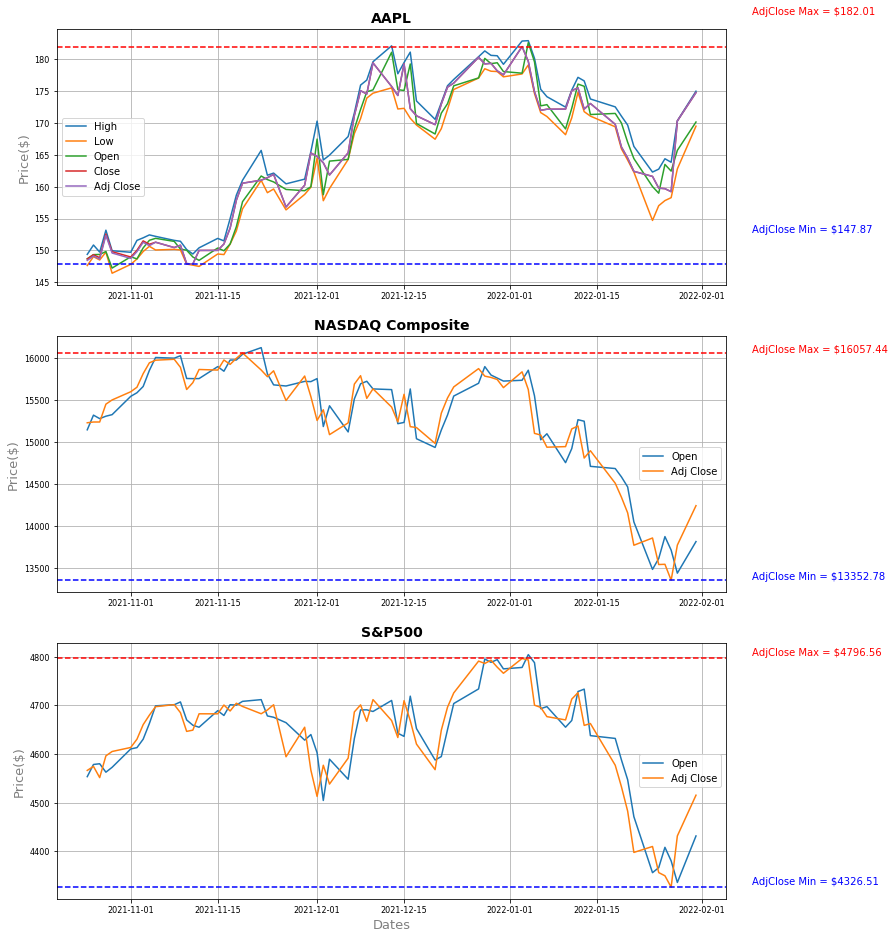

In [75]:
stock_df, nasdaq, snp = ticker_info()

In [76]:
# Create a single dataframe with every ticker data
nasdaq = nasdaq.rename({'Adj Close':'NASDAQ Close'}, axis=1)
snp = snp.rename({'Adj Close':'S&P500 Close'},axis=1)
ticker_df = pd.concat([stock_df, nasdaq[["NASDAQ Close"]], snp[["S&P500 Close"]]], axis=1).reset_index()

In [78]:
ticker_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,NASDAQ Close,S&P500 Close
0,2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.423386,15226.709961,4566.479980
1,2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.102402,15235.709961,4574.790039
2,2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.633087,15235.839844,4551.680176
3,2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.347656,15448.120117,4596.419922
4,2021-10-29,149.940002,146.410004,147.220001,149.800003,124850400.0,149.581696,15498.389648,4605.379883
